# CS-5312 Big Data Analytics
## Assignment 3: Curse of Dimensionality and Clustering

# Guidelines and Instructions:

• Deadline to submit the Assignment is March 28, 2022.

• Rename this notebook to yourID_Fullname_Assignment_3.

• You are required to do the Assignment tasks in Python (Jupyter Notebook).

• Along with this notebook(.ipynb file) also submit the .html version of this.

• In case of any query, please feel free to write us an email.

### 1. High Dimensional Data 
In this task, you will work with high dimensional data and demonstrate that they exhibit all three characteristics that are different manifestations of the so-called curse of dimensionality 
#### 1.1 Diminishing volume of n-ball 
1. Take N = 3000 points at random in range of $[−1, 1]^n$ 
2. Try n = [2, 3, 4, 5, 8, 10, 15, 20]
3. Count the number of these randomly generated points that are in the n-ball. These are the points whose distance from the origin is at most 1 (their L2-norm is at most 1) 
5. To reduce the effect of randomness (or increase the confidence level of your findings) repeat the above experiment 10 times. 
6. Plot the average and std-dev of the fraction of points inside n-ball for all n. You should use only one diagram to plot your findings. An error-bar plot is very helpful to visualize such information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy.spatial import distance
import seaborn as sb
from scipy import stats
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Function to extract points  whose distance from the origin is at most 1 
def random_gen_count(dim,samples=3000):
  # generate random points
  random_array = np.random.normal(-1, 1,(samples, dim))

  #count points with l2 norm at most 1
  count = 0
  for i in range(len(random_array)):
    if np.linalg.norm(random_array[i], ord=2)<=1:
      count+=1

  return count

In [3]:
n = [2, 3, 4, 5, 8, 10, 15, 20]
count = []

for i in range(len(n)):
  avg = []
  ## Repeat experiment 10 times to reduce randomness
  for j in range(10):
    avg.append(random_gen_count(n[i]))
  count.append(avg)
#### Take average of the counts
average =[]
stdev = []
for i in range(len(count)):
  average.append(st.mean(count[i]))
  stdev.append(st.stdev(count[i]))

Text(0, 0.5, 'Count')

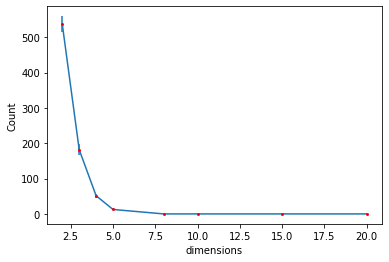

In [4]:
plt.errorbar(n, average,stdev ,marker='o', mfc='red',mec='black', ms=3, mew=0)
plt.xlabel('dimensions')
plt.ylabel('Count')

#### 1.2 Concentration of Distances 
1. Take N = 3000 points at random in range $[0, 1]^n$ 
2. Try n = [2, 5, 10, 20, 30, 50, 100]
3. Compute pairwise Euclidean distances between all N2 pairs of points and make sure that distances are normalized to [0, 1]. This can be achieved simply by dividing each distance by √n as this is the maximum possible distance 
4. Show box-plots and densities of these distances. Use multiple box-plots in one figure for each n. 
6. Show a matrix of density plots (small), limits of axes must be the same so we can make some sense of it. 
7. Also show the error-bar plots of average and std-dev of these distances for all n (one figure) 

In [51]:
## Function to compute pairwise Euclidean distances between all N2 pairs of points
## and making sure that distances are normalized to [0, 1]
def random_gen_euc(dim,samples=3000):
  # generate random points
  random_array = np.random.uniform(0, 1,(samples, dim))
  #random_array = stats.truncnorm.rvs(0, 1,loc = 0.55, scale = 1,size = (samples,dim))
  # calculate euclidean matrix
  euc = distance.cdist(random_array, random_array, 'euclidean')
  dist = []
  for i in range(len(euc)-1):
    dist.append(euc[i][i+1:])
  # normalise to [0,1]
  dist = np.multiply(dist, 1/np.sqrt(dim))
  return dist

In [52]:
n = [2, 5, 10, 20, 30, 50, 100]
euc_matrix = []
my_dict = {}
for i in range(len(n)):
  #my_dict[n[i]] = random_gen_euc(n[i])
  euc_matrix.append(random_gen_euc(n[i]))

dist_list = []
for i in range(len(euc_matrix)):
  newlist = [item for items in euc_matrix[i] for item in items]
  dist_list.append(newlist)
for i in range(len(n)):
  my_dict[n[i]] = dist_list[i]


Text(0, 0.5, 'Euclidean distance(normalised)')

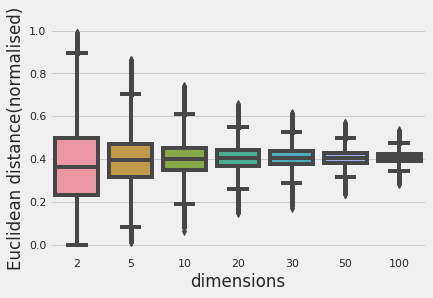

In [53]:
# Creating plot
plt.figure()
#plt.boxplot(dist_list,positions=n,widths=5)
ax = sns.boxplot( data=pd.DataFrame(my_dict))
plt.xlabel('dimensions')
plt.ylabel('Euclidean distance(normalised)')
# show plot
#plt.show()

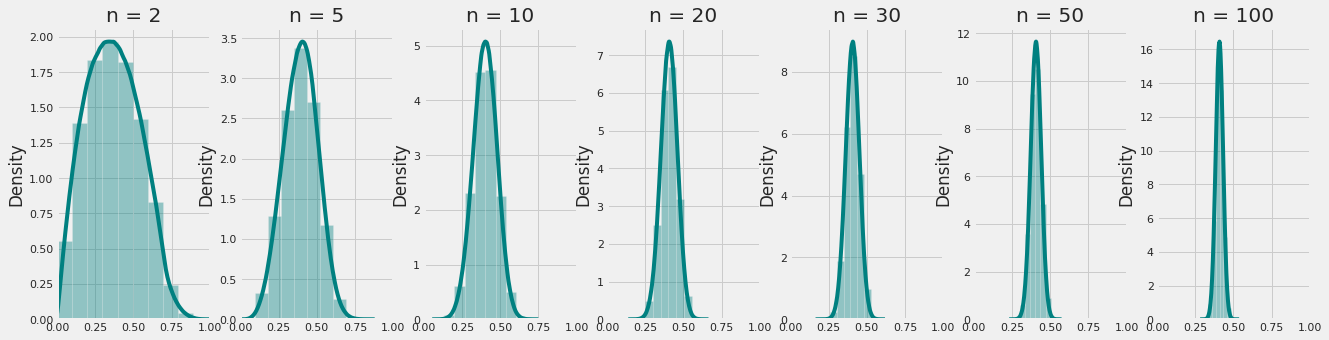

In [56]:
### Matrix of density plots
plt.figure(figsize = (20,5))
for i in range(len(n)):
  ax = plt.subplot(171+i)
  sb.distplot(x = dist_list[i]  ,  bins = 10 , kde = True , color = 'teal')
  plt.setp(ax, xlim=(0,1))
  plt.title('n = ' + str(n[i]))

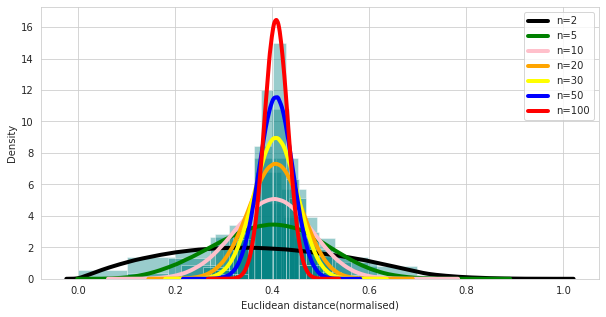

In [9]:
######  Observing over same axis (For higher dimensions, every point is equidistance to the other point.
# Euclidean distance loses its meaning )
 
sb.set_style("whitegrid") 
plt.figure(figsize = (10,5)) 
sb.distplot(x = dist_list[0]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
sb.distplot(x = dist_list[1]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'green'))
sb.distplot(x = dist_list[2]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'pink'))
sb.distplot(x = dist_list[3]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'orange'))
sb.distplot(x = dist_list[4]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'yellow'))
sb.distplot(x = dist_list[5]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'blue'))
sb.distplot(x = dist_list[6]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'red'))
plt.legend(['n=2', 'n=5','n=10', 'n=20',\
            'n=30','n=50', 'n=100'])
plt.xlabel('Euclidean distance(normalised)')
plt.show()

In [10]:
##### error-bar plots of average and std-dev of these distances for all n 
average =[]
stdev = []
for i in range(len(dist_list)):
  average.append(st.mean(dist_list[i]))
  stdev.append(st.stdev(dist_list[i]))

Text(0, 0.5, 'average distance')

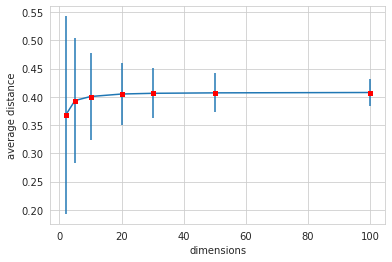

In [11]:
plt.errorbar(n, average,stdev, marker='s', mfc='red',mec='green', ms=5, mew=0)
plt.xlabel('dimensions')
plt.ylabel('average distance')

#### 1.3 Concentration of Angles 
1. Take N = 3000 unit vectors at random in range $[−1, 1]^n$ 
2. Try n =[2, 5, 10, 20, 30, 50, 100]. See slides for how to do this 
4. Compute pairwise angles between all N2 pairs of points (make sure to normalize angles by 180 so all are between 0 and 1).
5. Show box-plots and densities of these angles. For reporting follow the instructions as in the previous task.

In [12]:
import numpy as np
import math

def random_vectors(dim,samples=3000):
  # generate random Vectors
  random_array = np.random.uniform(-1, 1,(samples, dim))
  #random_array = stats.truncnorm.rvs(-1, 1,loc = 0, scale = 1,size = (samples,dim))
  norm=np.linalg.norm(random_array)
  random_array = random_array/norm
  
  dot_product = []
  ###### Calculate dot products between vectors
  for i in range(len(random_array)):
    for j in range(i,(len(random_array))):
      if i!=j:
        dot_product.append(np.dot(random_array[i], random_array[j]) )

  return dot_product

In [13]:
from matplotlib.pyplot import angle_spectrum
n = [2, 5, 10, 20, 30, 50, 100]
angles = []
my_dict ={}
for i in range(len(n)):
  #angles.append(np.multiply( np.arccos(random_vectors(n[i]) ),1/3.142  ) )
  # Use np.arcos to calculate angles; dividing angles by pi to normalise
  my_dict[n[i]] = np.multiply(np.arccos(random_vectors(n[i]) ),1/3.142  )




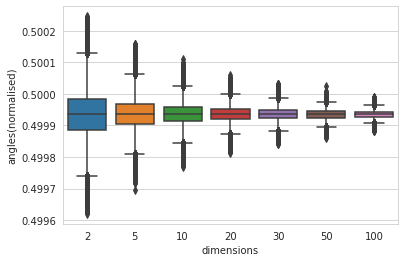

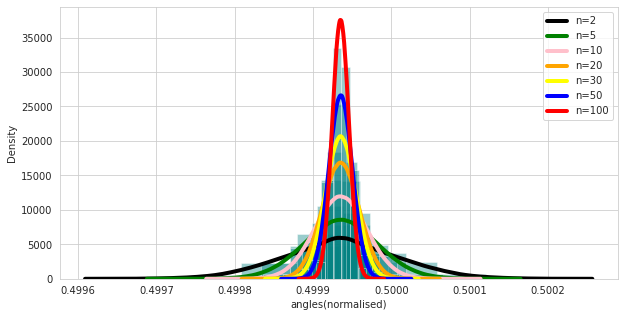

In [14]:
# Creating plot
plt.figure()
#plt.boxplot(dist_list,positions=n,widths=5)
ax = sns.boxplot( data=pd.DataFrame(my_dict))
plt.xlabel('dimensions')
plt.ylabel('angles(normalised)')
 
# show plot
plt.show()
sb.set_style("whitegrid") 
plt.figure(figsize = (10,5)) 
sb.distplot(x = my_dict[2]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
sb.distplot(x = my_dict[5]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'green'))
sb.distplot(x = my_dict[10]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'pink'))
sb.distplot(x = my_dict[20]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'orange'))
sb.distplot(x = my_dict[30]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'yellow'))
sb.distplot(x = my_dict[50]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'blue'))
sb.distplot(x = my_dict[100]  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'red'))
plt.legend(['n=2', 'n=5','n=10', 'n=20',\
            'n=30','n=50', 'n=100'])
plt.xlabel('angles(normalised)')
plt.show()



### 2. Clustering

You have to use the provided datasets (Amazon and Drivers dataset). Dataset description file (for both datasets) are also provided for your understanding.

#### 2.1. Agglomerative Clustering 
Note :In all of the below questions, stop clustering when you have only 4 clusters left. For each clustering technique, try to show its dendogram.

1. Perform agglomerative clustering (on the Drivers dataset) assuming clusters are represented by their centroids, and at each step the pair of clusters with closest centroids should be merged 


2. Repeat clustering choosing a pair of clusters to merge that has                                                             
(a) The minimum distance between any two points, one from each cluster.                                                         
(b) The minimum average distance between pairs of points, one from each of the two clusters.                                   
(c) such that the resulting cluster has The smallest radius.                                                                   
(d) such that the resulting cluster has the smallest diameter.                                                                 
(e) such that the resulting cluster has the largest density, where density is defined to be the number of points divided by     
i. The square of the radius                                                                                             
ii. The diameter (not squared) 

#### 2.2. Point Assignment Clustering 
You have to perform this task on Amazon dataset. 
Report both the external validation measures and internal evaluation measures you get with different initializations described below.e.g F1 score, Recall, Entropy, Silhouette Coefficient and Sum of Squared Error (SSE). Use your data summarization and visualization skills to concisely report your findings. 

2. Use k-means algorithm to cluster the dataset. Choose value of k by following methods       
(a) Randomly sample 150 points and perform hierarchical clustering on the sample with a few merging and stopping criteria, and use k to be the number of clusters when this algorithm stops.     
(b) Decide on k by doing a binary search for k (starting at j = 2 and repeatedly double it) and perform j-means clustering and observe where there is a big jump in average diameter of all j clusters and average radius, and total sum of square errors of j clusters. Plot the results (SSE) for each k and identify the right k (the Elbow method) 


Choosing the right initial k centers 
5. Here you should use k = 50, as this is the actual number of classes in the dataset          
(a) Choose the initial k centers at random             
(b) Select the first center at random, and each next center should be a point that is “farthest” from the already chosen centers (has the largest average distance from the already chosen centers)     
(c) Select a random sample of 150 points and perform hierarchical clustering by merging a pair of clusters with minimum inter-centroids distance until there are k clusters. Choose the centroids of these k clusters as initial centroids for the overall clusters.

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

In [16]:
#### Read file
dataset = pd.read_csv('Drivers/data_1024.csv')

X = dataset.iloc[:, [1, 2]].values
#X = normalize(X)

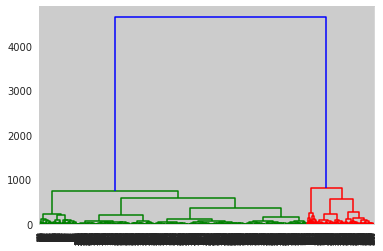

In [17]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

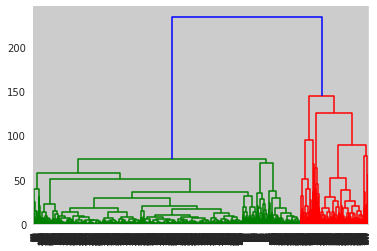

In [18]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

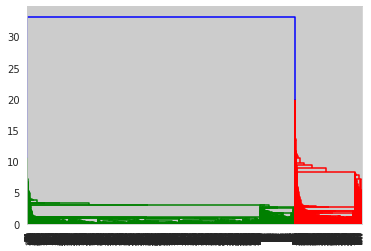

In [19]:
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))

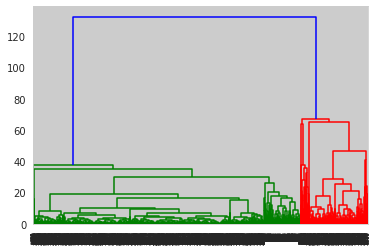

In [20]:
dendrogram = sch.dendrogram(sch.linkage(X, method='average'))

In [21]:
########### Agglomerative Clustering
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
def clusters(X,linkage_,title ):
  model = AgglomerativeClustering(n_clusters=4,linkage=linkage_)
  model.fit(X)
  y = model.labels_
  plt.figure()
  plt.gca().set_title(title)
  plt.scatter(X[:, 0], X[:, 1], c=vectorizer(y))


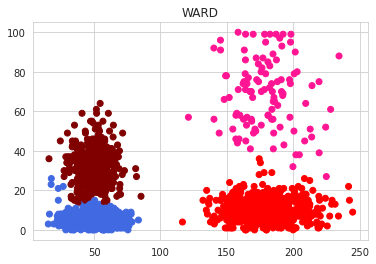

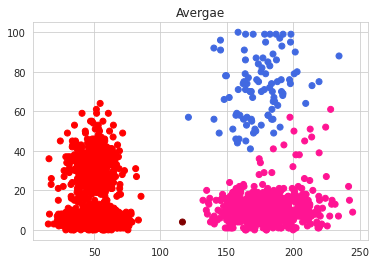

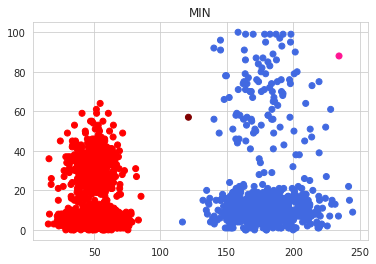

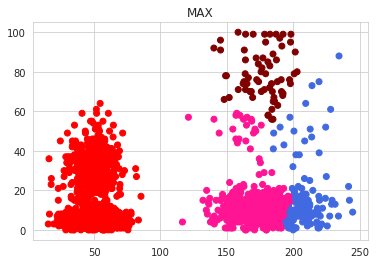

In [22]:
clusters(X,'ward','WARD')
clusters(X,'average','Avergae')
clusters(X,'single','MIN')
clusters(X,'complete','MAX')


In [23]:
####### Point Assignment Clustering

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [39]:
### Read data
data = pd.read_csv('Amazon/amazon_reviews_term_frequency_vectors.csv')
data.drop(data.tail(1).index,inplace=True) # drop last row

In [40]:
#data.head()
labels = data.Agresti
#### Data Preprocessing. Removing stopwords data
data = data.iloc[:,400:-1]
#X = data.iloc[:,400:-1]


In [41]:

###Perform PCA to reduce dimensions
X = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
scaler = StandardScaler()
principalDf = scaler.fit_transform(principalDf)
type(principalDf)

numpy.ndarray

Text(0, 0.5, 'SSE')

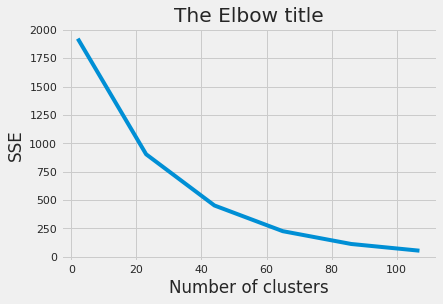

In [43]:
sse=[]
#start at 2 clusters for SSE and double after each iteration
i=2
while i <100:
  kmeans = KMeans(i)
  kmeans.fit(principalDf)
  sse_iter = kmeans.inertia_
  sse.append(sse_iter)
  i = 2*i

number_clusters =  range(2,i,21)
plt.plot(number_clusters,sse)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [44]:
kmeans = KMeans(init="random",n_clusters=45,n_init=10, max_iter=300,random_state=42 )
kmeans.fit(principalDf)

KMeans(init='random', n_clusters=45, random_state=42)

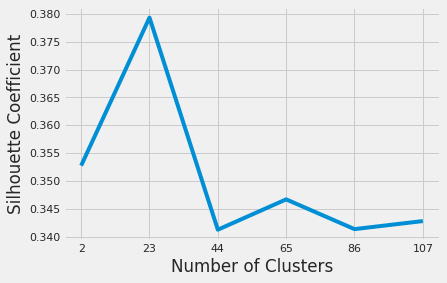

In [45]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
#start at 2 clusters for silhouette coefficient and double after each iteration
i=2
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
while i <100:
  kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
  kmeans.fit(principalDf)
  score = silhouette_score(principalDf, kmeans.labels_)
  silhouette_coefficients.append(score)
  i=2*i

###Plot
plt.style.use("fivethirtyeight")
plt.plot(range(2,i,21), silhouette_coefficients)
plt.xticks(range(2,i,21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [46]:
## Select a random sample of 150 points and perform hierarchical clustering 

In [48]:
###Perform PCA to reduce dimensions
X = StandardScaler().fit_transform(data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
####### select random samples
data = principalDf.sample(n = 150)

In [49]:
scaler = StandardScaler()
principalDf = scaler.fit_transform(data)

Text(0, 0.5, 'PCA component 2')

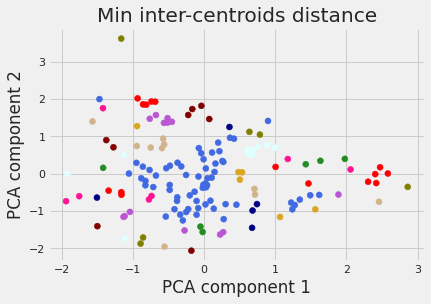

In [50]:
model = AgglomerativeClustering(n_clusters=50,linkage='single')
model.fit(principalDf)
y = model.labels_
plt.figure()
plt.gca().set_title("Min inter-centroids distance")
plt.scatter(principalDf[:, 0], principalDf[:, 1], c=vectorizer(y))
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')